<a href="https://colab.research.google.com/github/alongiladi/Machine_Learning_With_Python/blob/main/group_7_excercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 9. Submit your Notebook

Submit your completed Jupyter notebook file (.ipynb) with all the required code and visualizations named: `group_X_excercise_X.ipynb`

First 5 rows:
   Age  Selling_Price  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0    5           3.35           5.59       27000      0                 0   
1    6           4.75           9.54       43000      0                 1   
2    2           7.25           9.85        6900      0                 0   
3    8           2.85           4.15        5200      0                 0   
4    5           4.60           6.87       42450      0                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1  

Missing values:
Age                       0
Selling_Price             0
Present_Price             0
Kms_Driven          

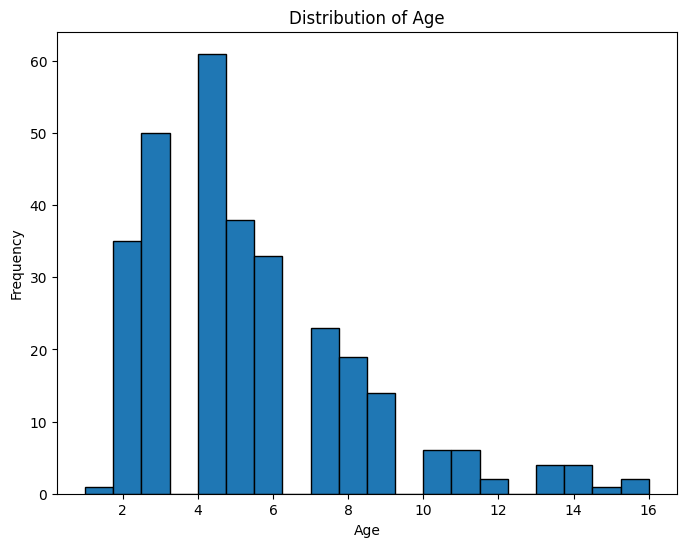

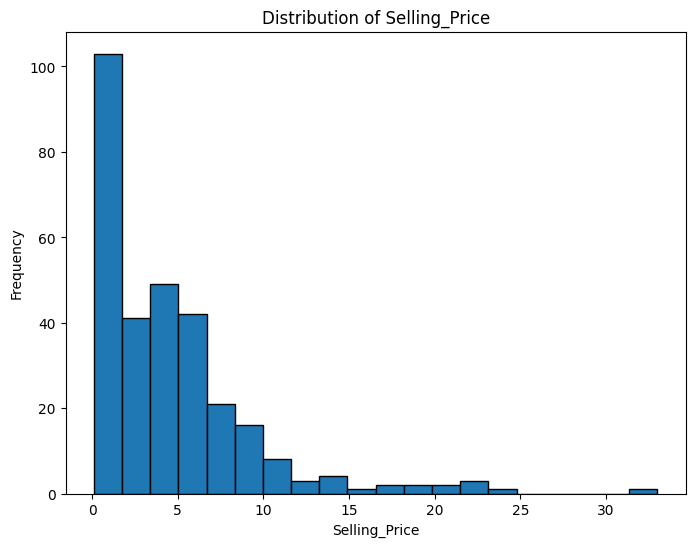

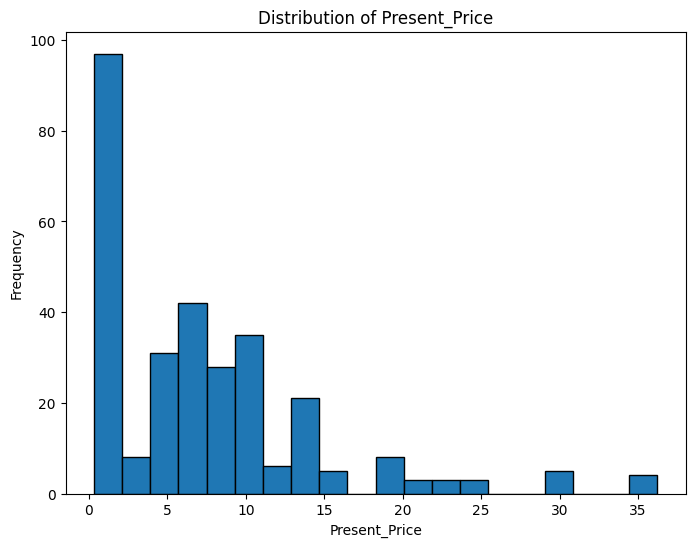

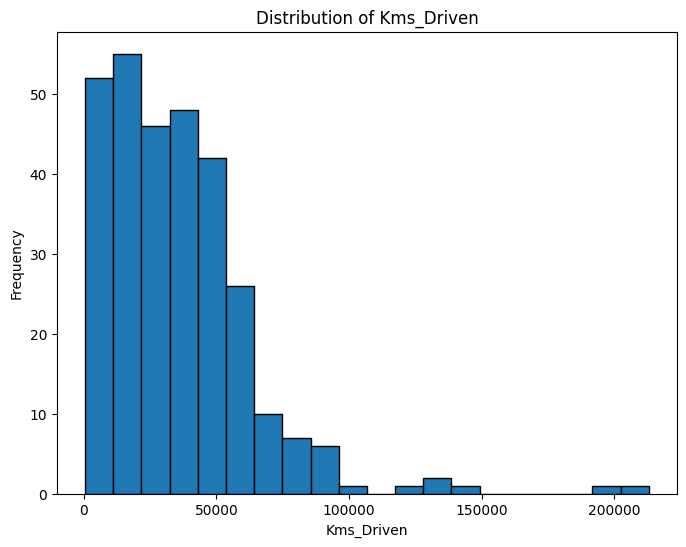

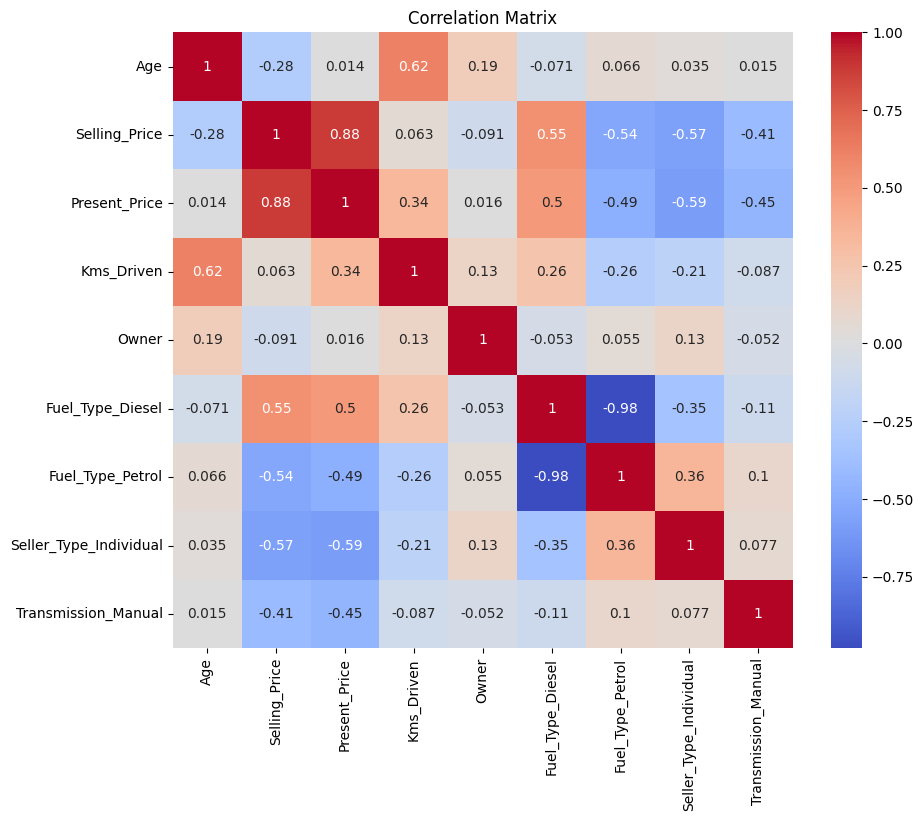


--- model 1: linear regression (All fetures) ---
X shape: (299, 8)
y shape: (299,)
X_train shape: (239, 8)
X_test shape: (60, 8)
y_train shape: (239,)
y_test shape: (60,)
MAE: 1.3268812247171897
MSE: 4.166613085516363
RMSE: 2.0412283276293133
R2: 0.8696590984347372

--- Model 2: liner regreson (highly correlated featurs) ---

Correlations with selling Price:
Selling_Price             1.000000
Present_Price             0.883903
Fuel_Type_Diesel          0.549127
Kms_Driven                0.062810
Owner                    -0.091101
Age                      -0.275162
Transmission_Manual      -0.412520
Fuel_Type_Petrol         -0.537184
Seller_Type_Individual   -0.570043
Name: Selling_Price, dtype: float64
X shape: (299, 5)
y shape: (299,)
X_train shape: (239, 5)
X_test shape: (60, 5)
y_train shape: (239,)
y_test shape: (60,)
MAE: 1.3372913405674791
MSE: 4.198970077598794
RMSE: 2.049138862449003
R2: 0.8686468999336034

--- model3: oolynomial regression (degree 2) ---
X shape: (299, 5)
y s

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv("https://raw.githubusercontent.com/schauppi/Intro_ML/main/datasets/car_data.csv")


print("First 5 rows:")
print(data.head())


print("\nMissing values:")
print(data.isnull().sum())


selected_cols = ["Age", "Selling_Price", "Present_Price", "Kms_Driven"]
data_selected = data[selected_cols]


print("\nSelected columns head:")
print(data_selected.head())


for col in data_selected.columns:
    plt.figure(figsize=(8,6))
    plt.hist(data_selected[col], bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

corr_matrix = data.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


print("\n--- model 1: linear regression (All fetures) ---")


X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']


print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


print("\n--- Model 2: liner regreson (highly correlated featurs) ---")


print("\nCorrelations with selling Price:")
print(corr_matrix['Selling_Price'].sort_values(ascending=False))


X = data.drop(['Selling_Price', 'Seller_Type_Individual', 'Fuel_Type_Petrol', 'Transmission_Manual'], axis=1)


y = data['Selling_Price']


print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


print("\n--- model3: oolynomial regression (degree 2) ---")


X = data.drop(['Selling_Price', 'Seller_Type_Individual', 'Fuel_Type_Petrol', 'Transmission_Manual'], axis=1)


y = data['Selling_Price']


print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

poly_features = PolynomialFeatures(degree=2)


X_poly = poly_features.fit_transform(X)


print(f"X_poly shape: {X_poly.shape}")


X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)